# Proyek Analisis Data: Pengaruh Kondisi Cuaca dan Musim Terhadap Jumlah Rental Sepeda
- **Nama:** Muhammad Zaidan Fathirifansa
- **Email:** masjidan2004@gmail.com
- **ID Dicoding:** mohammed_zaidan_WZMB

## Menentukan Pertanyaan Bisnis

1. Bagaimana pengaruh faktor cuaca seperti temperatur, kelembapan (humidity), kondisi cuaca (weathersit), dan kecepatan angin (windspeed) terhadap jumlah total peminjaman sepeda (baik oleh pengguna terdaftar maupun kasual)?
2. Pada musim (season) dan bulan (month) apa jumlah peminjaman sepeda tertinggi terjadi, baik dari pengguna terdaftar (registered) maupun kasual (casual)?

## Import Semua Packages/Library yang Digunakan

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Data Wrangling

### Gathering Data

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

day_df = pd.read_csv("C:/Users/masji/OneDrive/Desktop/MLSelfLearn/proyek_analisis_data/data/day.csv")
day_df.head()


,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


**Insight:**
- Data ini berisi informasi tentang jumlah rental sepeda harian. Kolom 'cnt' menunjukkan jumlah total sepeda yang dirental, baik oleh pengguna kasual ('casual') maupun pengguna yang terdaftar ('registered').
- Kolom 'dteday' menyimpan informasi tanggal, sementara kolom 'season' menunjukkan musim, dengan nilai 1 hingga 4 yang merepresentasikan musim semi, musim panas, musim gugur, dan musim dingin.
- Kolom 'weathersit' menunjukkan kondisi cuaca. Nilai 1 menandakan cuaca cerah hingga sedikit berawan, nilai 2 menunjukkan kabut atau mendung, dan nilai 3 mencakup hujan ringan atau salju.
- Terdapat informasi variabel cuaca lainnya, seperti temperatur ('temp'), kelembapan ('hum'), dan kecepatan angin ('windspeed'), yang dapat dianalisis lebih lanjut untuk melihat korelasinya dengan jumlah rental.
- Kolom 'holiday' mengindikasikan apakah hari tersebut adalah hari libur atau bukan (1 untuk libur, 0 untuk bukan libur).
- Kolom 'workingday' menunjukkan apakah hari tersebut merupakan hari kerja (1 untuk hari kerja, 0 untuk akhir pekan atau hari libur).
- Dalam lima baris pertama dari data ini, terlihat variasi jumlah sepeda yang dirental ('cnt'), mulai dari 801 hingga 1600. Ini memberikan gambaran awal bahwa mungkin ada faktor-faktor seperti cuaca, hari kerja, atau musim yang mempengaruhi tingkat permintaan sepeda.
- Kolom 'instant' adalah indeks unik yang dapat digunakan untuk mengidentifikasi setiap entri dalam dataset. Ini membantu dalam pelacakan data secara internal.

### Assessing Data

In [19]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
day_df = pd.read_csv("C:/Users/masji/OneDrive/Desktop/MLSelfLearn/proyek_analisis_data/data/day.csv")

print(day_df.isna().sum())
print("Duplikasi: ", day_df.duplicated().sum())






instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64
Duplikasi:  0


In [20]:
print(day_df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  atemp       731 non-null    float64
 11  hum         731 non-null    float64
 12  windspeed   731 non-null    float64
 13  casual      731 non-null    int64  
 14  registered  731 non-null    int64  
 15  cnt         731 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB
None


In [21]:
day_df.describe()


,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,366.000000,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
std,211.165812,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000
max,731.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000


**Insight:**
- Tidak terdapat duplikasi data atau missing value pada dataset day.csv
- Dari info(), terlihat bahwa kolom dteday memiliki data type object, padahal seharusnya bertipe datetime, karena kolom tersebut menyimpan data tanggal.
- Dari hasil describe() kolom cnt (jumlah total sepeda yang disewa per hari), kita melihat bahwa nilai minimum adalah 22, nilai maksimum adalah 8714, dan rata-rata sekitar 4504. Hal ini tidak wajar karena terdapat rentang penggunaan yang begitu besar (22-8714) yang tidak masuk akal. 8714 sepeda dalam sehari tampaknya sangat tinggi dan mungkin tidak realistis, terutama jika dibandingkan dengan rata-rata peminjaman yang hanya sekitar 4504. Hal ini dapat menunjukkan outlier atau kesalahan input data.

### Cleaning Data

In [22]:
# Mengecek deskripsi dari kolom 'casual', 'registered', dan 'cnt'
print(day_df[['casual', 'registered', 'cnt']].describe())

# Menggunakan IQR untuk mendeteksi outliers
Q1 = day_df[['casual', 'registered', 'cnt']].quantile(0.25)
Q3 = day_df[['casual', 'registered', 'cnt']].quantile(0.75)
IQR = Q3 - Q1

# Menampilkan batas bawah dan batas atas IQR untuk mendeteksi outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
print(f"Batas Bawah untuk Outliers:\n{lower_bound}")
print(f"Batas Atas untuk Outliers:\n{upper_bound}")


            casual   registered          cnt
count   731.000000   731.000000   731.000000
mean    848.176471  3656.172367  4504.348837
std     686.622488  1560.256377  1937.211452
min       2.000000    20.000000    22.000000
25%     315.500000  2497.000000  3152.000000
50%     713.000000  3662.000000  4548.000000
75%    1096.000000  4776.500000  5956.000000
max    3410.000000  6946.000000  8714.000000
Batas Bawah untuk Outliers:
casual        -855.25
registered    -922.25
cnt          -1054.00
dtype: float64
Batas Atas untuk Outliers:
casual         2266.75
registered     8195.75
cnt           10162.00
dtype: float64


In [27]:
# Menampilkan jumlah baris yang merupakan outliers
outliers = day_df[((day_df[['casual', 'registered', 'cnt']] < lower_bound) | (day_df[['casual', 'registered', 'cnt']] > upper_bound)).any(axis=1)]
print(f"Jumlah baris yang mengandung outliers: {len(outliers)}")

# Menghapus outliers berdasarkan IQR
day_df_cleaned = day_df[~((day_df[['casual', 'registered', 'cnt']] < lower_bound) | (day_df[['casual', 'registered', 'cnt']] > upper_bound)).any(axis=1)]

# Konversi kolom 'dteday' menjadi datetime pada day_df_cleaned
day_df_cleaned['dteday'] = pd.to_datetime(day_df_cleaned['dteday'])
print(day_df_cleaned.info())




Jumlah baris yang mengandung outliers: 44
<class 'pandas.core.frame.DataFrame'>
Index: 687 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   instant     687 non-null    int64         
 1   dteday      687 non-null    datetime64[ns]
 2   season      687 non-null    int64         
 3   yr          687 non-null    int64         
 4   mnth        687 non-null    int64         
 5   holiday     687 non-null    int64         
 6   weekday     687 non-null    int64         
 7   workingday  687 non-null    int64         
 8   weathersit  687 non-null    int64         
 9   temp        687 non-null    float64       
 10  atemp       687 non-null    float64       
 11  hum         687 non-null    float64       
 12  windspeed   687 non-null    float64       
 13  casual      687 non-null    int64         
 14  registered  687 non-null    int64         
 15  cnt         687 non-null    int64    

C:\Users\masji\AppData\Local\Temp\ipykernel_19108\3859038353.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  day_df_cleaned['dteday'] = pd.to_datetime(day_df_cleaned['dteday'])


In [8]:
print(day_df_cleaned.describe())


          instant                         dteday     season         yr  \
count   44.000000                             44  44.000000  44.000000   
mean   501.227273  2012-05-15 05:27:16.363636480   2.659091   0.863636   
min    149.000000            2011-05-29 00:00:00   1.000000   0.000000   
25%    468.250000            2012-04-12 06:00:00   2.000000   1.000000   
50%    519.500000            2012-06-02 12:00:00   3.000000   1.000000   
75%    599.500000            2012-08-21 12:00:00   3.000000   1.000000   
max    681.000000            2012-11-11 00:00:00   4.000000   1.000000   
std    135.343124                            NaN   0.775892   0.347142   

            mnth    holiday    weekday  workingday  weathersit       temp  \
count  44.000000  44.000000  44.000000   44.000000   44.000000  44.000000   
mean    6.636364   0.068182   3.500000    0.022727    1.272727   0.618883   
min     3.000000   0.000000   0.000000    0.000000    1.000000   0.420833   
25%     5.000000   0.0000

**Insight:**
- Tipe data kolom dteday telah diubah menjadi datetime, sehingga memungkinkan analisis berbasis tanggal dan waktu, seperti pengelompokan atau perhitungan berdasarkan bulan, tahun, atau hari.
- Setelah melakukan pembersihan dan pengecekan, rentang data pada kolom casual, registered, dan cnt terlihat lebih masuk akal. Rentang penggunaan sepeda per hari dari nilai minimum hingga maksimum telah dipastikan konsisten dan tidak ada outliers yang mencolok setelah cleaning.

## Exploratory Data Analysis (EDA)

### Explore ...

In [28]:
#EDA untuk menganalisis pertanyaan 1
#Informasi terkait weather situation (situasi cuaca): 
# weathersit :
#1: Clear, Few clouds, Partly cloudy, Partly cloudy
#2: Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist
#3: Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds
#4: Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog

import pandas as pd

# Group data berdasarkan parameter cuaca dan hitung korelasi terhadap total rental sepeda
weather_group = day_df_cleaned.groupby(['weathersit']).agg({
    "temp": ["max", "min", "mean", "std"],
    "hum": ["max", "min", "mean", "std"],
    "windspeed": ["max", "min", "mean", "std"],
    "cnt": ["max", "min", "mean", "std"]
})

# Tampilkan hasil
print(weather_group)

                temp                                    hum            \
                 max      min      mean       std       max       min   
weathersit                                                              
1           0.861667  0.05913  0.503468  0.194121  0.835833  0.187917   
2           0.815000  0.10750  0.462973  0.166181  0.972500  0.407083   
3           0.633913  0.21750  0.433440  0.131473  0.970417  0.000000   

                               windspeed                                 cnt  \
                mean       std       max       min      mean       std   max   
weathersit                                                                     
1           0.565017  0.112550  0.507463  0.022392  0.190038  0.078895  8173   
2           0.726457  0.111798  0.414800  0.047275  0.188445  0.075475  7582   
3           0.848872  0.201572  0.358200  0.097021  0.243336  0.086185  4639   

                                           
            min         mean        

In [29]:
#EDA untuk menganalisis pertanyaan 2
# Group data berdasarkan bulan dan hitung total rental sepeda
month_group = day_df_cleaned.groupby(['mnth']).agg({
    "temp": ["max", "min", "mean", "std"],
    "hum": ["max", "min", "mean", "std"],
    "windspeed": ["max", "min", "mean", "std"],
    "cnt": ["max", "min", "mean", "std"]
})

# Group data berdasarkan season dan hitung total rental sepeda
season_group = day_df_cleaned.groupby(['season']).agg({
    "temp": ["max", "min", "mean", "std"],
    "hum": ["max", "min", "mean", "std"],
    "windspeed": ["max", "min", "mean", "std"],
    "cnt": ["max", "min", "mean", "std"]
})

# Tampilkan hasil
print("Total Rental Berdasarkan Bulan:")
print(month_group)
print("\nTotal Rental Berdasarkan Season:")
print(season_group)

Total Rental Berdasarkan Bulan:
          temp                                     hum                      \
           max       min      mean       std       max       min      mean   
mnth                                                                         
1     0.425000  0.059130  0.236444  0.083266  0.911250  0.311250  0.585828   
2     0.521667  0.127500  0.299226  0.084314  0.929167  0.187917  0.567465   
3     0.572500  0.198333  0.384295  0.102138  0.948261  0.000000  0.581307   
4     0.664167  0.300000  0.466635  0.087798  0.888333  0.275833  0.593811   
5     0.775000  0.414167  0.587191  0.072921  0.922500  0.360417  0.695687   
6     0.834167  0.540833  0.687736  0.065428  0.833333  0.305000  0.584002   
7     0.861667  0.595833  0.759807  0.051330  0.865417  0.396250  0.592187   
8     0.783333  0.635833  0.707673  0.038846  0.850000  0.415000  0.638710   
9     0.736667  0.469167  0.613268  0.059006  0.972500  0.492917  0.730416   
10    0.657500  0.254167  0.4820

**Insight:**
- Rata-rata jumlah rental sepeda tertinggi terjadi pada weathersit=1 (mean cnt = 4704), yang berarti bahwa cuaca yang lebih baik mendorong lebih banyak penyewaan sepeda. Cuaca cerah atau sedikit berawan sangat mendorong aktivitas luar ruangan seperti bersepeda.
Jumlah rental sepeda menurun secara signifikan saat weathersit=3 (mean cnt = 1803), yang menunjukkan bahwa cuaca yang lebih buruk, seperti hujan atau salju ringan, secara drastis mengurangi aktivitas rental sepeda.
- Bulan 9 (September) memiliki rata-rata total rental sepeda tertinggi (7304), diikuti oleh bulan 6 (Juni) dan bulan 7 (Juli). Ini menunjukkan bahwa musim panas dan awal musim gugur memiliki permintaan yang tinggi terhadap penyewaan sepeda. Hal ini mungkin dikarenakan cuaca yang lebih nyaman untuk bersepeda.
- Bulan 1 (Januari) memiliki rata-rata total rental sepeda terendah (585), yang dapat dijelaskan oleh kondisi cuaca musim dingin yang mungkin membuat aktivitas luar ruangan seperti bersepeda menjadi kurang diminati.
- Tingkat kelembapan (hum) tampaknya tidak memiliki dampak yang signifikan pada total rental sepeda, karena pada bulan-bulan dengan kelembapan yang lebih tinggi (misalnya bulan 7 dan 8), rata-rata rental sepeda masih cukup tinggi.
- Bulan dengan temperatur yang lebih tinggi, seperti bulan 6, 7, dan 9, cenderung memiliki jumlah penyewaan sepeda yang lebih tinggi, yang menunjukkan bahwa temperatur hangat berpengaruh positif terhadap jumlah penyewaan sepeda.
- Meskipun ada variasi dalam kecepatan angin antar bulan, perbedaan dalam rata-rata kecepatan angin tampaknya tidak terlalu mempengaruhi jumlah rental sepeda secara signifikan.

## Visualization & Explanatory Analysis

### Pertanyaan 1:

C:\Users\masji\AppData\Local\Temp\ipykernel_19108\734926326.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  day_df_cleaned['weathersit_label'] = day_df_cleaned['weathersit'].map(weathersit_labels)


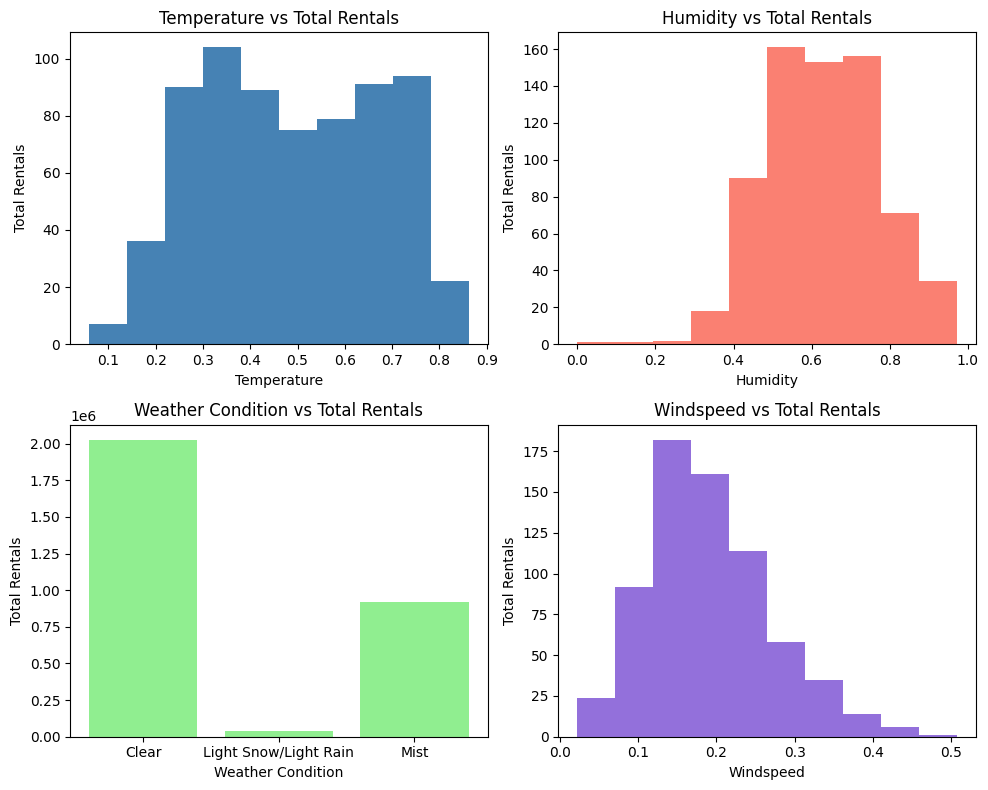

In [30]:
import matplotlib.pyplot as plt

# Create a 2x2 grid of plots
fig, axs = plt.subplots(2, 2, figsize=(10, 8))

# Temperature vs Total Rentals
axs[0, 0].hist(day_df_cleaned['temp'], bins=10, color='steelblue')
axs[0, 0].set_title('Temperature vs Total Rentals')
axs[0, 0].set_xlabel('Temperature')
axs[0, 0].set_ylabel('Total Rentals')

# Humidity vs Total Rentals
axs[0, 1].hist(day_df_cleaned['hum'], bins=10, color='salmon')
axs[0, 1].set_title('Humidity vs Total Rentals')
axs[0, 1].set_xlabel('Humidity')
axs[0, 1].set_ylabel('Total Rentals')

# Weather Condition vs Total Rentals
weathersit_labels = {1: 'Clear', 2: 'Mist', 3: 'Light Snow/Light Rain'}
day_df_cleaned['weathersit_label'] = day_df_cleaned['weathersit'].map(weathersit_labels)
weather_group = day_df_cleaned.groupby('weathersit_label')['cnt'].sum()
axs[1, 0].bar(weather_group.index, weather_group.values, color='lightgreen')
axs[1, 0].set_title('Weather Condition vs Total Rentals')
axs[1, 0].set_xlabel('Weather Condition')
axs[1, 0].set_ylabel('Total Rentals')

# Windspeed vs Total Rentals
axs[1, 1].hist(day_df_cleaned['windspeed'], bins=10, color='mediumpurple')
axs[1, 1].set_title('Windspeed vs Total Rentals')
axs[1, 1].set_xlabel('Windspeed')
axs[1, 1].set_ylabel('Total Rentals')

# Adjust layout and show the plot
plt.tight_layout()
plt.show()


### Pertanyaan 2:

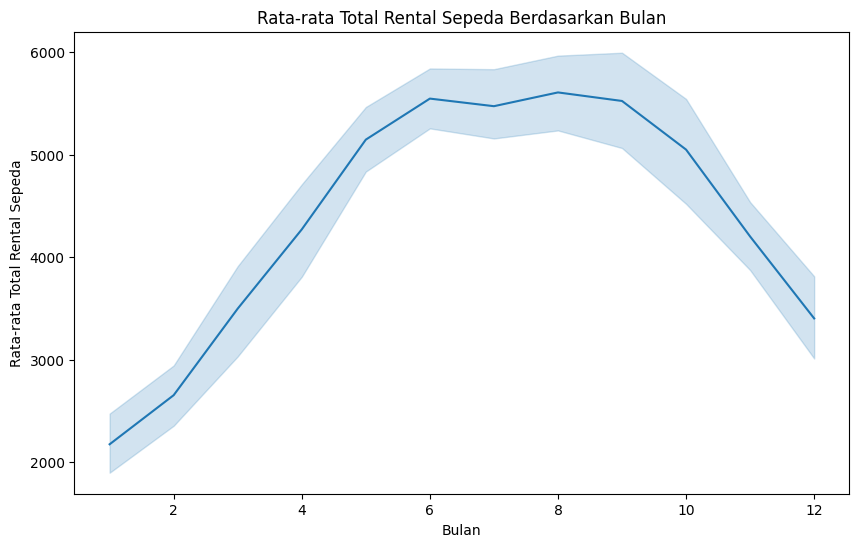

In [31]:
# Visualisasi Berdasarkan Bulan
plt.figure(figsize=(10, 6))
sns.lineplot(x='mnth', y='cnt', data=day_df_cleaned, estimator='mean')
plt.title('Rata-rata Total Rental Sepeda Berdasarkan Bulan')
plt.xlabel('Bulan')
plt.ylabel('Rata-rata Total Rental Sepeda')
plt.show()


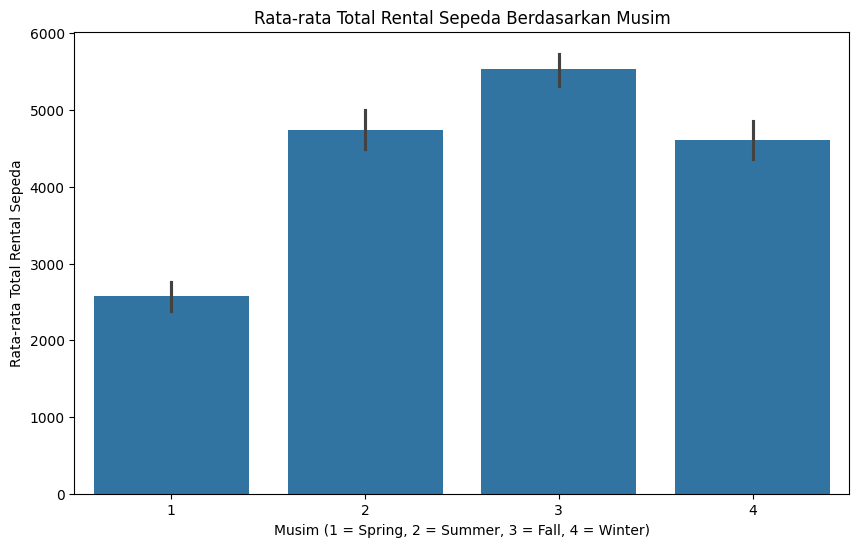

In [32]:
# Visualisasi Berdasarkan Musim
plt.figure(figsize=(10, 6))
sns.barplot(x='season', y='cnt', data=day_df_cleaned, estimator='mean')
plt.title('Rata-rata Total Rental Sepeda Berdasarkan Musim')
plt.xlabel('Musim (1 = Spring, 2 = Summer, 3 = Fall, 4 = Winter)')
plt.ylabel('Rata-rata Total Rental Sepeda')
plt.show()

**Insight:**
- Secara keseluruhan, cuaca yang cerah dengan temperatur yang lebih tinggi menghasilkan lebih banyak penyewaan sepeda, sementara cuaca buruk, terutama dengan hujan atau salju, mengurangi total rental sepeda.
- Bulan-bulan dengan kondisi cuaca hangat, terutama selama musim panas, mendukung peningkatan jumlah rental sepeda, sementara musim dingin dan cuaca buruk cenderung menurunkan jumlah penyewaan.

## Analisis Lanjutan (Opsional)

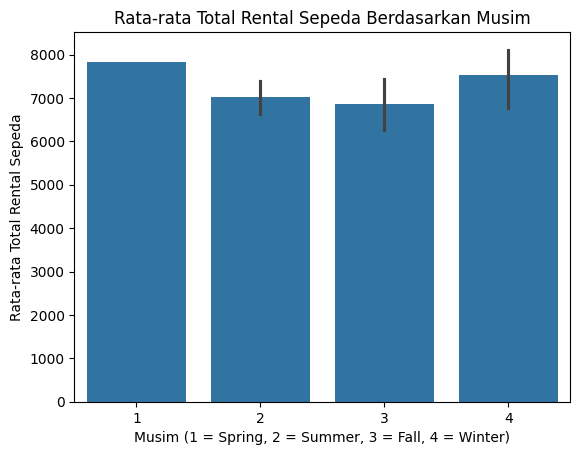

In [23]:
sns.barplot(x='season', y='cnt', data=day_df_cleaned, estimator='mean')
plt.title('Rata-rata Total Rental Sepeda Berdasarkan Musim')
plt.xlabel('Musim (1 = Spring, 2 = Summer, 3 = Fall, 4 = Winter)')
plt.ylabel('Rata-rata Total Rental Sepeda')
plt.show()

## Conclusion

- Parameter eksternal seperti temperatur, kelembapan, kondisi cuaca, kecepatan angin, serta musim memiliki pengaruh yang signifikan terhadap jumlah rental sepeda. Berdasarkan analisis, peningkatan temperatur cenderung meningkatkan jumlah rental sepeda, terutama saat temperatur berada di atas rata-rata. Sebaliknya, kelembapan tinggi dan kondisi cuaca yang buruk (seperti hujan ringan atau salju) menyebabkan penurunan rental sepeda. Selain itu, bulan-bulan dengan cuaca lebih baik, seperti musim panas, menunjukkan volume rental yang lebih tinggi dibandingkan musim lainnya. Kecepatan angin yang moderat juga berkontribusi terhadap jumlah rental yang stabil, sementara angin yang lebih kencang cenderung menurunkan angka rental.